In [90]:
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt

from util.conferences import *
from util.infections import get_infection_data

In [91]:
correct_cwd()

In [92]:
rutte_data, de_jonge_data = get_number_of_sentences_in_conference(
    get_conference_data(include_journalist_questions=False))
rutte_texts = [content['text'] for content in rutte_data]
de_jonge_texts = [content['text'] for content in de_jonge_data]
date_strings = [content['date'] for content in rutte_data]
n_rutte_sentences = [content['number_of_sentences'] for content in rutte_data]
dates = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in date_strings]

In [93]:
print(len(rutte_texts))

60


In [94]:
infections = get_infection_data()
infections['new_infection_ma'] = infections['new_infections'].rolling(window=7).mean()

sentence_lengths = pd.DataFrame()
sentence_lengths['sentence_length'] = [get_average_sentence_length(text) for text in rutte_texts]
sentence_lengths['sentence_length_ma'] = sentence_lengths['sentence_length'].rolling(window=5).mean()
sentence_lengths['number_of_words'] = [get_number_of_words(text) for text in rutte_texts]
sentence_lengths['number_of_words_ma'] = sentence_lengths['number_of_words'].rolling(window=5).mean()
infections

,date,total_infections,new_infections,new_infection_ma
0,2020-03-13,804,804,NaN
1,2020-03-14,959,155,NaN
2,2020-03-15,1135,176,NaN
3,2020-03-16,1413,278,NaN
4,2020-03-17,1705,292,NaN
...,...,...,...,...
679,2022-01-21,3778287,57471,39624.571429
680,2022-01-22,3824344,46057,41653.714286
681,2022-01-23,3889669,65325,45810.000000
682,2022-01-24,3954299,64630,48992.571429


In [95]:
# from https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
def two_lines(t1, data1, t2, data2, y_label1):
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)

    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel(y_label1, color=color)
    ax1.plot(t1, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('New infections per day MA', color=color)  # we already handled the x-label with ax1
    ax2.plot(t2, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-l
    matplotlib.rcParams['figure.dpi'] = 300
    plt.savefig(f'output/{y_label1}.png')
    plt.show()

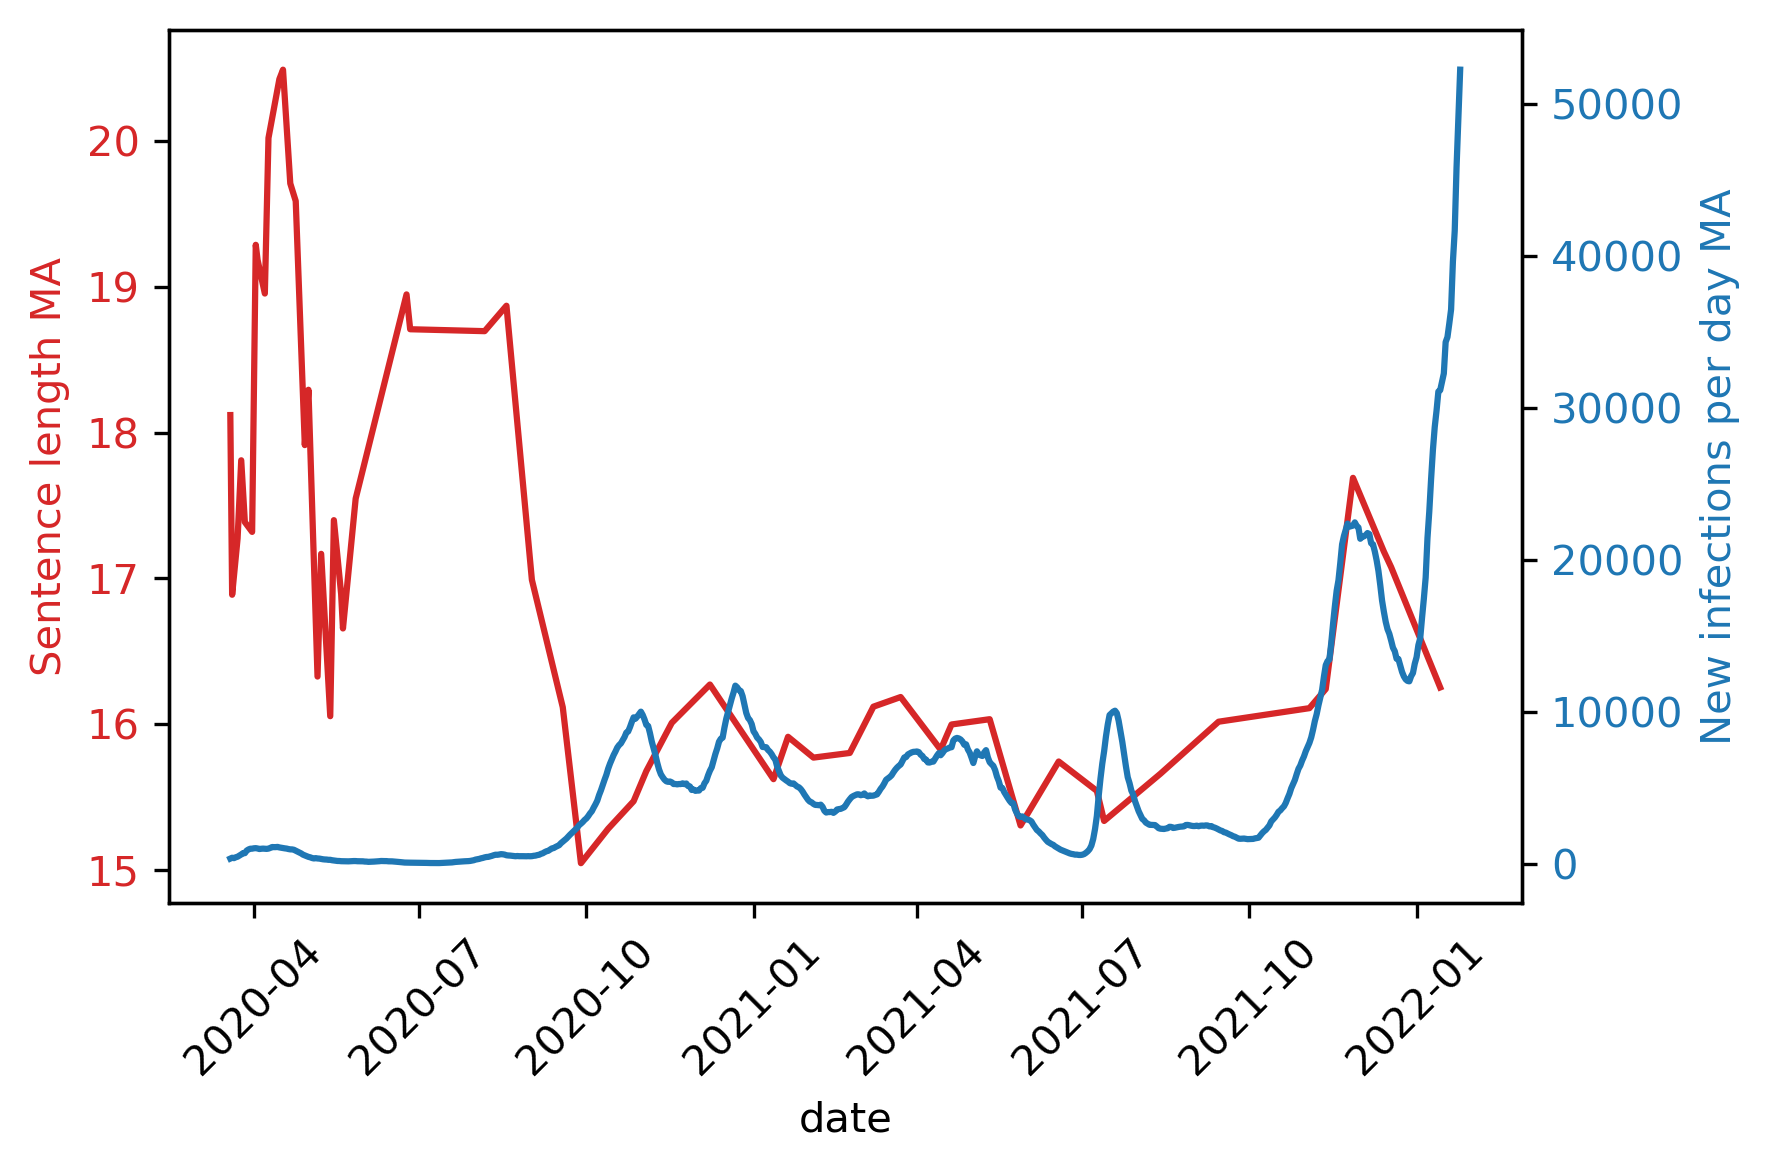

In [96]:
x = dates
y = sentence_lengths['sentence_length_ma']

x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in infections.date]
y2 = infections.new_infection_ma
two_lines(x, y, x2, y2, 'Sentence length MA')

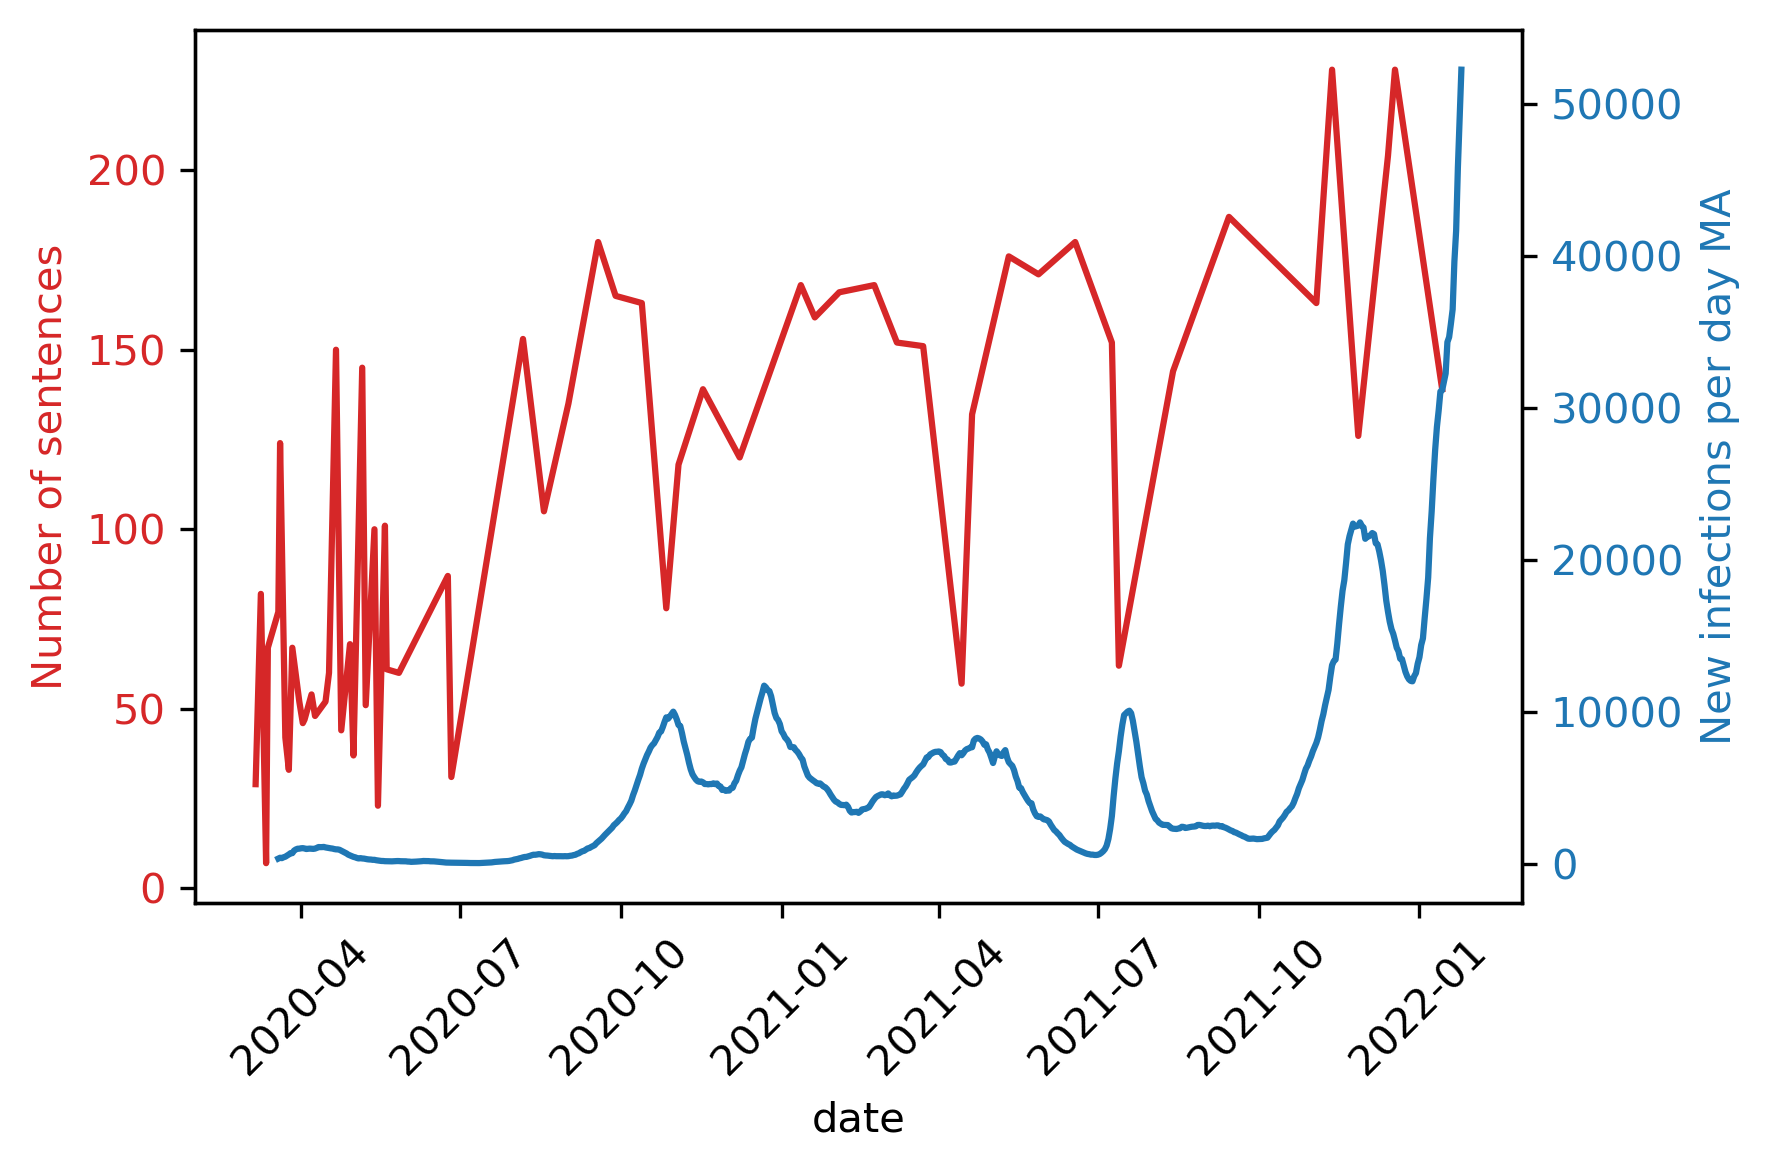

In [97]:
x = dates
y = n_rutte_sentences

x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in infections.date]
y2 = infections.new_infection_ma

two_lines(x, y, x2, y2, 'Number of sentences')

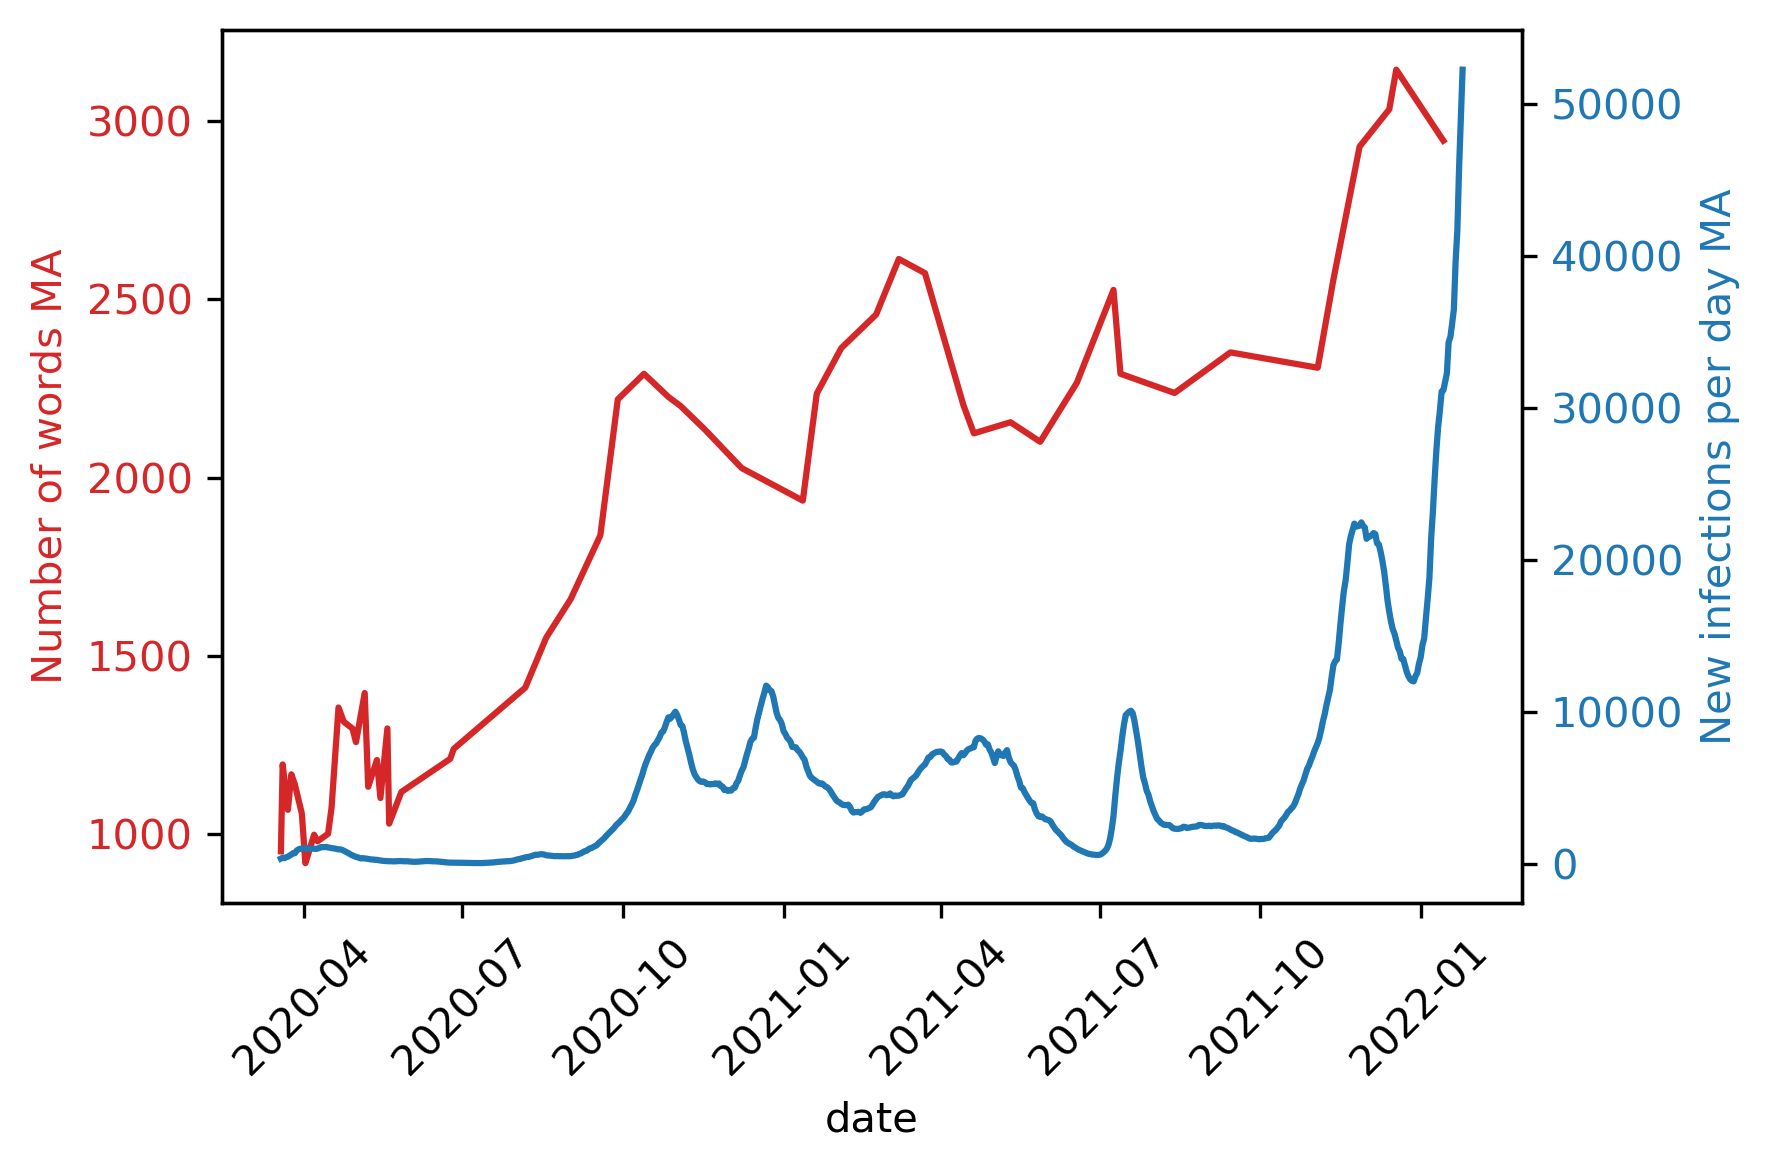

In [98]:
x = dates
y = sentence_lengths['number_of_words_ma']

x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in infections.date]
y2 = infections.new_infection_ma
two_lines(x, y, x2, y2, 'Number of words MA')